In [2]:
#from LungSegmentation_Threshold import get_segmented_lungs
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import matplotlib.pyplot as plt
import cv2

In [7]:
img = cv2.imread('/Users/phoenixji/Desktop/LungData/2D CT /CT_COVID/2020.01.24.919183-p27-132.png')

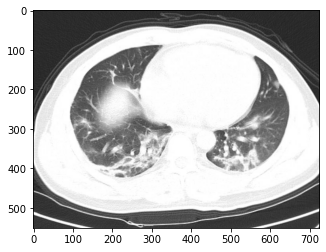

In [8]:
plt.imshow(img)

In [4]:
img = cv2.resize(img,(128,128))

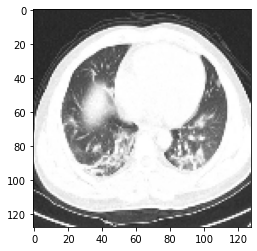

In [5]:
plt.imshow(img)

In [37]:
COVID_PathName ='/Users/phoenixji/Desktop/LungData/2D CT /CT_COVID/'
NonCovid_PathName ='/Users/phoenixji/Desktop/LungData/2D CT /CT_NonCOVID/'

In [38]:
COVID_DIR = os.listdir(COVID_PathName)
NonCovid_DIR = os.listdir(NonCovid_PathName)

In [52]:
len(COVID_DIR)

349

In [53]:
len(NonCovid_DIR)

397

In [39]:
COVIDSet = []

In [40]:
label=[]

In [41]:
for x in COVID_DIR:
    
    if x=='.DS.Store':
        continue
    img = cv2.imread(COVID_PathName+x)
    print(img.shape)
    img = cv2.resize(img,(128,128))
    print(img.shape)
    COVIDSet.append(img)
    label.append(1)

(269, 346, 3)
(128, 128, 3)
(473, 627, 3)
(128, 128, 3)
(406, 572, 3)
(128, 128, 3)
(98, 115, 3)
(128, 128, 3)
(278, 417, 3)
(128, 128, 3)
(308, 412, 3)
(128, 128, 3)
(124, 172, 3)
(128, 128, 3)
(212, 310, 3)
(128, 128, 3)
(323, 442, 3)
(128, 128, 3)
(374, 501, 3)
(128, 128, 3)
(374, 501, 3)
(128, 128, 3)
(323, 442, 3)
(128, 128, 3)
(212, 310, 3)
(128, 128, 3)
(124, 172, 3)
(128, 128, 3)
(440, 512, 3)
(128, 128, 3)
(920, 926, 3)
(128, 128, 3)
(88, 148, 3)
(128, 128, 3)
(404, 574, 3)
(128, 128, 3)
(473, 627, 3)
(128, 128, 3)
(269, 346, 3)
(128, 128, 3)
(269, 346, 3)
(128, 128, 3)
(128, 217, 3)
(128, 128, 3)
(920, 924, 3)
(128, 128, 3)
(303, 516, 3)
(128, 128, 3)
(124, 172, 3)
(128, 128, 3)
(188, 300, 3)
(128, 128, 3)
(374, 501, 3)
(128, 128, 3)
(323, 442, 3)
(128, 128, 3)
(323, 442, 3)
(128, 128, 3)
(374, 501, 3)
(128, 128, 3)
(194, 305, 3)
(128, 128, 3)
(124, 172, 3)
(128, 128, 3)
(552, 871, 3)
(128, 128, 3)
(410, 572, 3)
(128, 128, 3)
(196, 300, 3)
(128, 128, 3)
(155, 247, 3)
(128, 12

(272, 436, 3)
(128, 128, 3)
(336, 489, 3)
(128, 128, 3)
(110, 167, 3)
(128, 128, 3)
(1021, 1441, 3)
(128, 128, 3)
(76, 143, 3)
(128, 128, 3)
(202, 287, 3)
(128, 128, 3)
(381, 538, 3)
(128, 128, 3)
(1049, 1671, 3)
(128, 128, 3)
(305, 407, 3)
(128, 128, 3)
(383, 562, 3)
(128, 128, 3)
(203, 411, 3)
(128, 128, 3)
(385, 584, 3)
(128, 128, 3)
(192, 249, 3)
(128, 128, 3)
(225, 427, 3)
(128, 128, 3)
(237, 338, 3)
(128, 128, 3)
(241, 372, 3)
(128, 128, 3)
(307, 406, 3)
(128, 128, 3)
(202, 287, 3)
(128, 128, 3)
(107, 146, 3)
(128, 128, 3)
(108, 180, 3)
(128, 128, 3)
(321, 356, 3)
(128, 128, 3)
(320, 499, 3)
(128, 128, 3)
(246, 364, 3)
(128, 128, 3)
(260, 378, 3)
(128, 128, 3)
(225, 430, 3)
(128, 128, 3)
(245, 511, 3)
(128, 128, 3)
(202, 287, 3)
(128, 128, 3)
(202, 287, 3)
(128, 128, 3)
(351, 509, 3)
(128, 128, 3)
(276, 385, 3)
(128, 128, 3)
(272, 436, 3)
(128, 128, 3)
(345, 475, 3)
(128, 128, 3)
(218, 272, 3)
(128, 128, 3)
(99, 155, 3)
(128, 128, 3)
(202, 287, 3)
(128, 128, 3)
(94, 147, 3)
(128,

In [42]:
for x in NonCovid_DIR:
    
    img = cv2.imread(NonCovid_PathName+x)
    print(img.shape)
    img = cv2.resize(img,(128,128))
    print(img.shape)
    COVIDSet.append(img)
    label.append(0)

(223, 349, 3)
(128, 128, 3)
(372, 450, 3)
(128, 128, 3)
(143, 189, 3)
(128, 128, 3)
(327, 386, 3)
(128, 128, 3)
(632, 756, 3)
(128, 128, 3)
(355, 466, 3)
(128, 128, 3)
(482, 602, 3)
(128, 128, 3)
(476, 511, 3)
(128, 128, 3)
(231, 329, 3)
(128, 128, 3)
(157, 236, 3)
(128, 128, 3)
(285, 390, 3)
(128, 128, 3)
(252, 379, 3)
(128, 128, 3)
(249, 385, 3)
(128, 128, 3)
(401, 512, 3)
(128, 128, 3)
(280, 384, 3)
(128, 128, 3)
(155, 230, 3)
(128, 128, 3)
(233, 330, 3)
(128, 128, 3)
(471, 508, 3)
(128, 128, 3)
(205, 327, 3)
(128, 128, 3)
(496, 601, 3)
(128, 128, 3)
(350, 457, 3)
(128, 128, 3)
(326, 390, 3)
(128, 128, 3)
(375, 512, 3)
(128, 128, 3)
(312, 468, 3)
(128, 128, 3)
(649, 797, 3)
(128, 128, 3)
(479, 664, 3)
(128, 128, 3)
(294, 394, 3)
(128, 128, 3)
(500, 664, 3)
(128, 128, 3)
(408, 512, 3)
(128, 128, 3)
(304, 383, 3)
(128, 128, 3)
(232, 329, 3)
(128, 128, 3)
(280, 384, 3)
(128, 128, 3)
(279, 377, 3)
(128, 128, 3)
(156, 227, 3)
(128, 128, 3)
(233, 328, 3)
(128, 128, 3)
(321, 507, 3)
(128, 

(311, 512, 3)
(128, 128, 3)
(291, 383, 3)
(128, 128, 3)
(316, 375, 3)
(128, 128, 3)
(475, 604, 3)
(128, 128, 3)
(325, 434, 3)
(128, 128, 3)
(460, 646, 3)
(128, 128, 3)
(557, 673, 3)
(128, 128, 3)
(351, 702, 3)
(128, 128, 3)
(665, 676, 3)
(128, 128, 3)
(473, 666, 3)
(128, 128, 3)
(372, 508, 3)
(128, 128, 3)
(176, 260, 3)
(128, 128, 3)
(564, 750, 3)
(128, 128, 3)
(364, 510, 3)
(128, 128, 3)
(294, 383, 3)
(128, 128, 3)
(273, 393, 3)
(128, 128, 3)
(190, 226, 3)
(128, 128, 3)
(393, 512, 3)
(128, 128, 3)
(190, 224, 3)
(128, 128, 3)
(180, 319, 3)
(128, 128, 3)
(345, 512, 3)
(128, 128, 3)
(295, 383, 3)
(128, 128, 3)
(276, 394, 3)
(128, 128, 3)
(179, 261, 3)
(128, 128, 3)
(224, 311, 3)
(128, 128, 3)
(396, 600, 3)
(128, 128, 3)


In [43]:
len(label)

746

In [44]:
len(COVIDSet)

746

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(COVIDSet), np.array(label), test_size = 0.20, random_state = 0)

In [48]:
X_train.shape

(596, 128, 128, 3)

In [49]:
X_test.shape

(150, 128, 128, 3)

In [50]:
y_train.shape

(596,)

In [51]:
np.save('X_train_2D_Class',X_train)
np.save('y_train_2D_Class',y_train)
np.save('X_test_2D_Class',X_test)
np.save('y_test_2D_Class',y_test)